#LIBRERIAS

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.preprocessing import StandardScaler #Escalamiento para todos

#Regresion

from sklearn.metrics import r2_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#Regresion lineal
from sklearn.linear_model import LinearRegression 

#KNN Vecinos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor #para regresion

#Arboles
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn import tree

#Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Regresion Logistica
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, plot_roc_curve

#K-Means
from sklearn.cluster import KMeans

#Agrupamiento Jerarquico
from sklearn.cluster import AgglomerativeClustering

#CONEXION DATA

1. gender: "Male", "Female" or "Other"
2. age: age of the patient
3. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
4. heart disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 
5. ever-married: "No" or "Yes"
6. worktype: "children", "Govtjov", "Neverworked", "Private" or "Self-employed" 
7. Residencetype: "Rural" or "Urban"
8. avgglucoselevel: average glucose level in blood
9. bmi: body mass index
10. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
11. stroke: 1 if the patient had a stroke or 0 if not

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Proyecto 2/brain_stroke.csv")
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


#a) Analisis exploratorio de la data

#a.1) Revision de datos nulos

In [61]:
df.info() #no tenemos datos nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


#a.2) Revision de duplicados

In [62]:
df.duplicated().sum() #No hay duplicados.

0

#a.3) Explorar el racional de los datos

In [63]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


**De las variables numericas que son medida de algun indice, parece ser que todos los rangos son razonables y posibles: la edad es entre 0,08 (menor de un año) y 82**

*   La edad es entre 0,08 (menor de un año) y 82
*   El nivel de glucosa está entre 55 y 271, que es un rango que existe
*   El BMI es desde 14 hasta 49 que es un rango que existe

Fuentes: https://medlineplus.gov/spanish/ency/article/007196.htm / https://www.mayoclinic.org/es-es/diseases-conditions/prediabetes/diagnosis-treatment/drc-20355284#:~:text=pr%C3%B3ximas%20dos%20horas.-,En%20general%3A,de%20dos%20horas%20indica%20diabetes.

In [64]:
infarto=df['stroke']==1
df_infarto=df.loc[infarto,:]
df_infarto.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


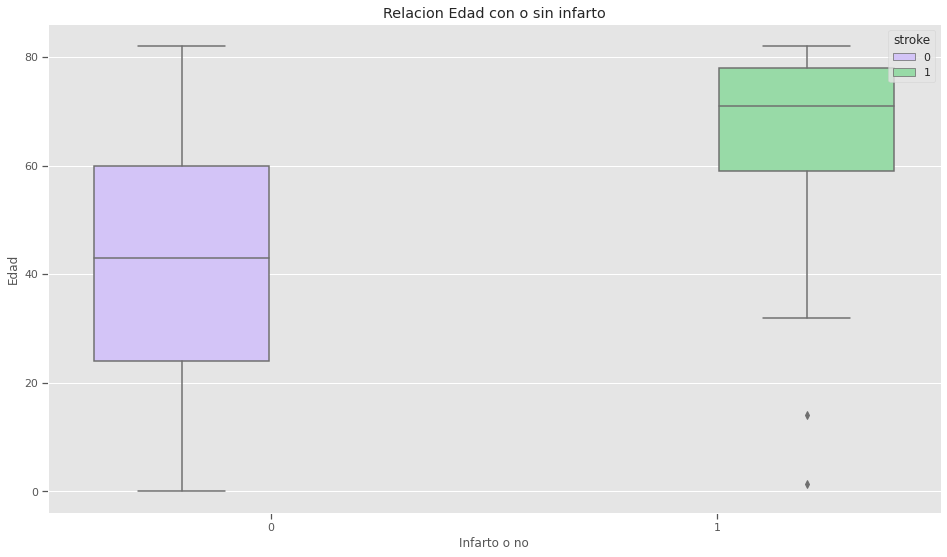

In [78]:
sns.boxplot(x='stroke',y='age',data=df,hue='stroke' , palette=["m", "g"],)
plt.title('Relacion Edad con o sin infarto')
plt.xlabel('Infarto o no')
plt.ylabel('Edad') 
plt.show()

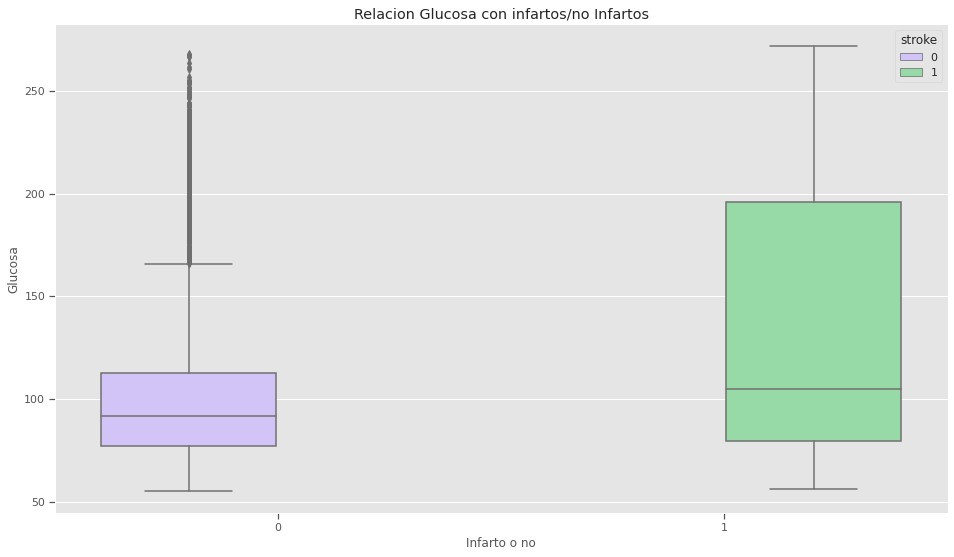

In [77]:
sns.boxplot(x='stroke',y='avg_glucose_level',data=df,hue='stroke' , palette=["m", "g"],)
plt.title('Relacion Glucosa con infartos/no Infartos')
plt.xlabel('Infarto o no')
plt.ylabel('Glucosa') 
plt.show()

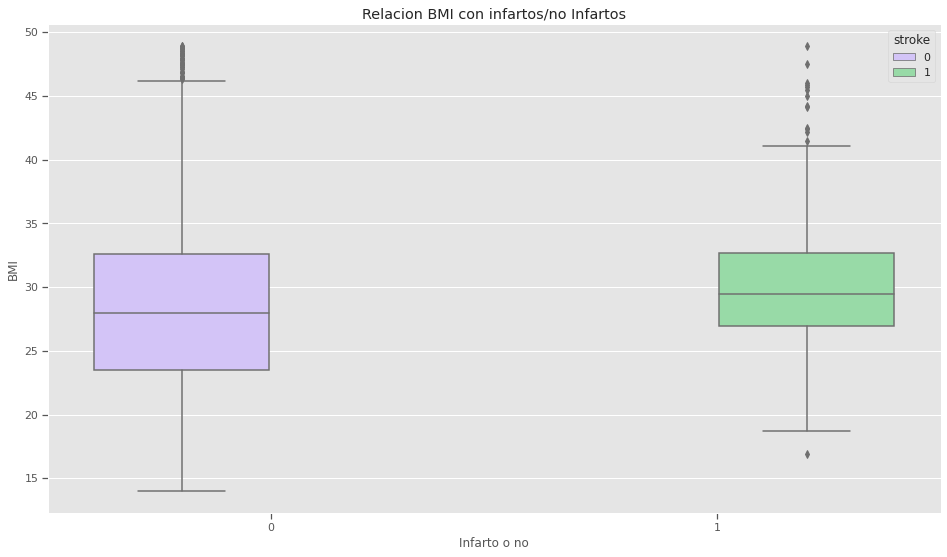

In [80]:
sns.boxplot(x='stroke',y='bmi',data=df,hue='stroke' , palette=["m", "g"],)
plt.title('Relacion BMI con infartos/no Infartos')
plt.xlabel('Infarto o no')
plt.ylabel('BMI') 
plt.show()

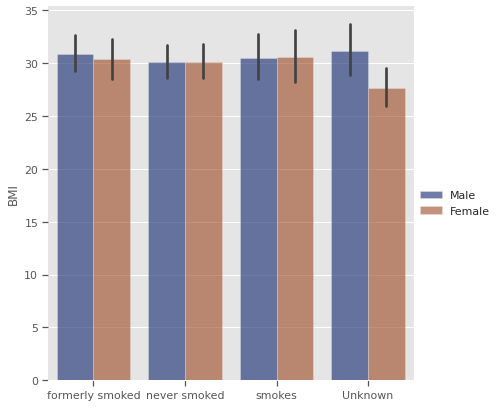

In [68]:
g = sns.catplot(
    data=df_infarto, kind="bar",
    x="smoking_status", y="bmi", hue="gender",
    palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Smoking Status", "BMI")
g.legend.set_title("Relacion Fumadores/BMI por sexo")

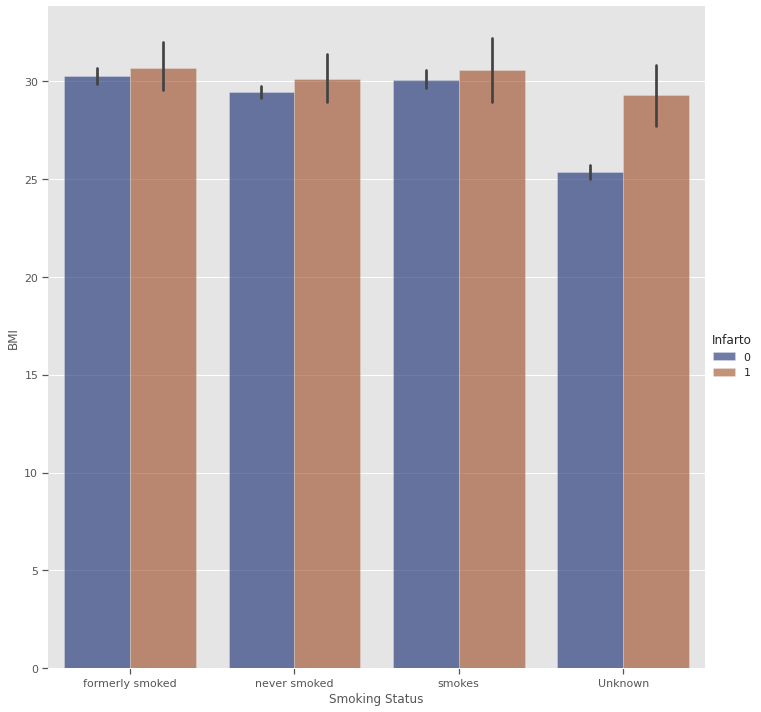

In [73]:
g = sns.catplot(
    data=df, kind="bar",
    x="smoking_status", y="bmi", hue="stroke",
    palette="dark", alpha=.6, height=10
)
g.despine(left=True)
g.set_axis_labels("Smoking Status", "BMI")
g.legend.set_title("Infarto")

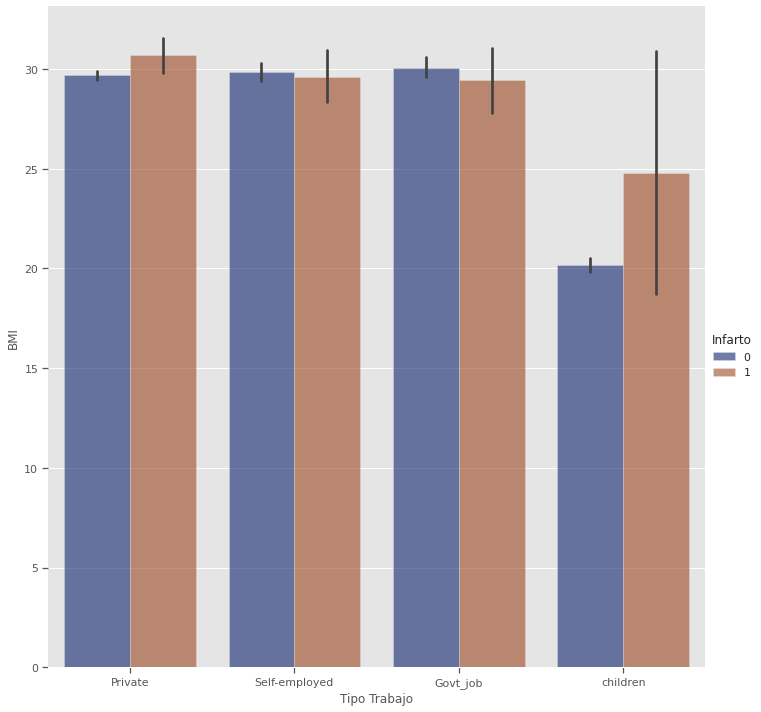

In [96]:
g = sns.catplot(
    data=df, kind="bar",
    x="work_type", y="bmi", hue="stroke",
    palette="dark", alpha=.6, height=10
)
g.despine(left=True)
g.set_axis_labels("Tipo Trabajo", "BMI")
g.legend.set_title("Infarto")

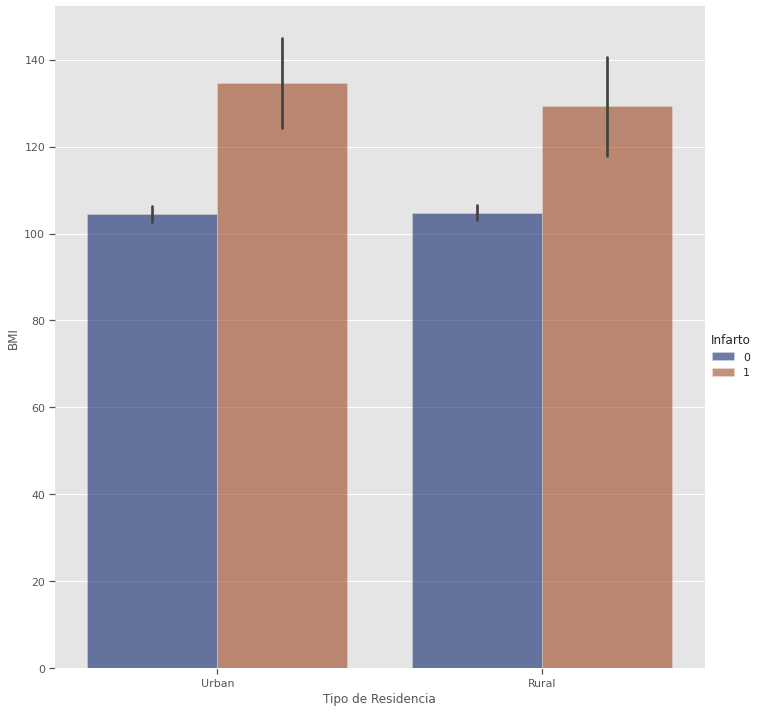

In [98]:
g = sns.catplot(
    data=df, kind="bar",
    x="Residence_type", y="avg_glucose_level", hue="stroke",
    palette="dark", alpha=.6, height=10
)
g.despine(left=True)
g.set_axis_labels("Tipo de Residencia", "BMI")
g.legend.set_title("Infarto")

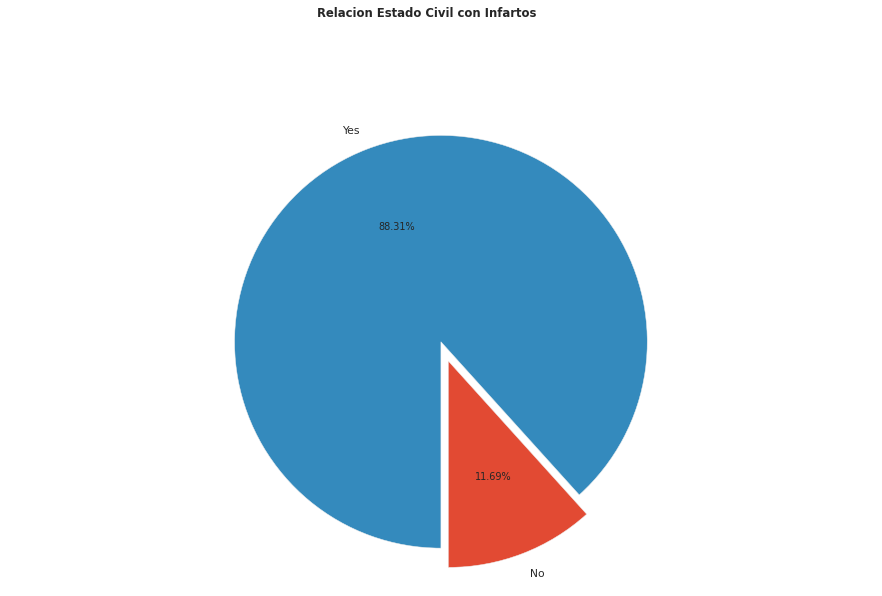

In [95]:
fig = plt.figure(dpi=70)
ax = fig.add_subplot(1,1,1) 
explotar = [0.1, 0]

ax.pie(df_infarto.groupby(['ever_married'])['stroke'].count().values, labels=df_infarto.groupby(['ever_married'])['stroke'].count().index, explode=explotar,autopct="%.2f%%", shadow = False, startangle=-90)
ax.axis("equal")

fig.suptitle("Relacion Estado Civil con Infartos", fontsize=12, fontweight="bold", y=1.05)
plt.show()

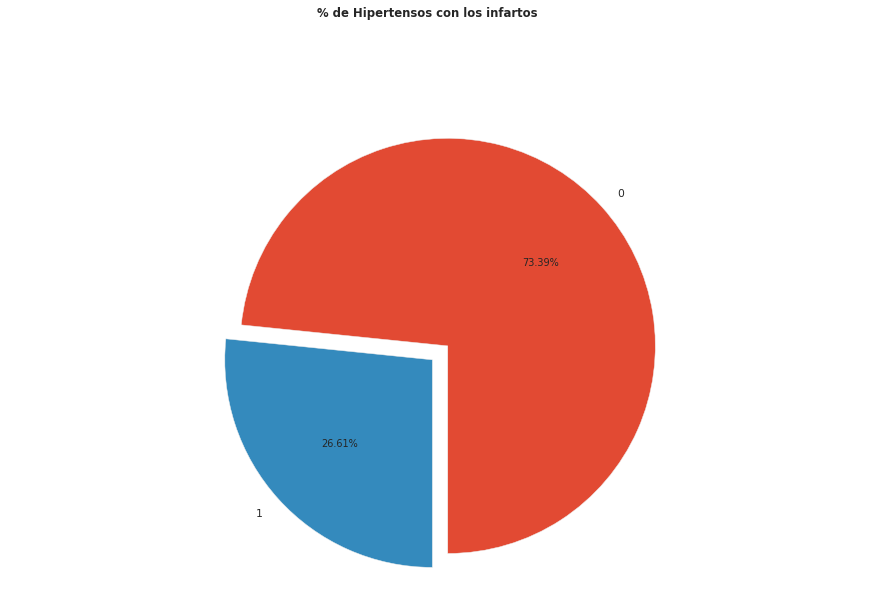

In [94]:
fig = plt.figure(dpi=70)
ax = fig.add_subplot(1,1,1) 
explotar = [0.1, 0]

ax.pie(df_infarto.groupby(['hypertension'])['stroke'].count().values, labels=df_infarto.groupby(['hypertension'])['stroke'].count().index, explode=explotar,autopct="%.2f%%", shadow = False, startangle=-90)
ax.axis("equal")

fig.suptitle("% de Hipertensos con los infartos", fontsize=12, fontweight="bold", y=1.05)
plt.show()

In [ ]:
df.groupby(['gender'])['gender'].count()

In [91]:
df.groupby(['ever_married'])['ever_married'].count()

ever_married
No     1701
Yes    3280
Name: ever_married, dtype: int64

In [ ]:
df.groupby(['work_type'])['work_type'].count()

In [ ]:
df.groupby(['Residence_type'])['Residence_type'].count()

In [ ]:
df.groupby(['smoking_status'])['smoking_status'].count()

In [ ]:
df['gender'] = pd.factorize(df['gender'])[0]
df['ever_married'] = pd.factorize(df['ever_married'])[0]
df['work_type'] = pd.factorize(df['work_type'])[0]
df['Residence_type'] = pd.factorize(df['Residence_type'])[0]
df['smoking_status'] = pd.factorize(df['smoking_status'])[0]

In [ ]:
df.groupby(['gender'])['gender'].count() #0:Male 1:Female

In [ ]:
df.groupby(['ever_married'])['ever_married'].count() #0:yes 1:No

In [ ]:
df.groupby(['work_type'])['work_type'].count() #0:Private, 1:self.employed, 2:Govt_job, 3:Children

In [ ]:
df.groupby(['Residence_type'])['Residence_type'].count() #0: Urban 1: Rural

In [ ]:
df.groupby(['smoking_status'])['smoking_status'].count() #0:formely smoked, 1: never smoked 2: smokes 3:unknown

In [ ]:
df.hist()
plt.show()

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')